# Networks: Friends, Epidemics & Terrorists
## The Structure of Real Networks



In [ ]:
# Make sure you run this code cell everytime you open the notebook!
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions
import matplotlib as mplt        # Import Matplotlib library as plt for its plotting functions
import pandas as pd              # Import Pandas library as pd for its data management functions

1. INTERNET: WEB CRAWLER
2. WWW 
3. NETWORKS FROM INSTAGRAM, FACEBOOK AND/OR TWITTER
4. BIOLOGICAL NETWORKS: E.G., STRINGDB
5. CITATION NETWORKS FROM A DATABASE LIKE GOOGLE SCHOLAR
6. TRANSPORTATION NETWORKS: MAYBE A DATABASE

## DATASETS

These are several network datasets provided in Barabasi's website. We will first upload the dataset, and then use NetworkX package to analyze this network.

## UNDIRECTED NETWORKS

***1) Actor:*** Based on 2004 imdb data. Nodes represent actors, two nodes are connected if the corresponding actors made at least one movie together. Made for TV, direct-to-video and video game entries were removed. Preprocessed data courtesy of Hawoong Jeong. 

***2) Collaboration:*** Scientific collaboration network based on the arXiv preprint archive's Condense Matter Physics category covering the period from January 1993 to April 2003. Each node represents an author, and two nodes are connected if they co-authored at least one paper in the dataset. Ref: Leskovec, J., Kleinberg, J., & Faloutsos, C. (2007). Graph evolution: Densification and shrinking diameters. ACM Transactions on Knowledge Discovery from Data (TKDD), 1(1), 2.

***3) Internet:*** Network of routers connected to each other compiled by the Center for Applied Internet Data Analysis (CAIDA). Nodes are routers, and they are connected if they are directly connected via cables. For details of the non-trivial task of collecting the data see the reference. Ref: http://www.caida.org/tools/measurement/skitter/router_topology/

***4) Power Grid:*** Network representing the Western States Power Grid of the United States. Each node is a power plant, transformer or consumer, and two nodes are connected if they are physically connected via a cable. Ref: Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of a small-world networks. nature, 393(6684), 440-442.

***5) Protein:*** Network representing the protein-protein interactions in yeast. Each node represents a protein, and they are connected if they physically interact within the cell. Original data: http://interactome.dfci.harvard.edu/S_cerevisiae/index.php?page=download Ref: Yu, H., Braun, P., Yildirim, M. A., Lemmens, I., Venkatesan, K., Sahalie, J., ... & Vidal, M. (2008). High-quality binary protein interaction map of the yeast interactome network. Science, 322(5898), 104-110.

***6) Phone Calls:*** Nodes represent a sample of cell phone users, they are connected if they have called each other at least once during the observed period. Data set contains a subset of most active users from (Song et al, 2010). Data provided by Chaoming Song. Ref: Song, C., Qu, Z., Blumm, N., & BarabÃ¡si, A. L. (2010). Limits of predictability in human mobility. Science, 327(5968), 1018-1021.

## DIRECTED NETWORKS

***7) Citation:*** Citation network of the APS journals (Physical Review Letters, Physical Review, and Reviews of Modern Physics). Each node represents a paper, and there is a directed link connecting node A to node B, if A cites B. Original data: http://journals.aps.org/datasets Details: Redner, S. (2004). Citation statistics from more than a century of physical review. arXiv preprint physics/0407137.

***8) Metabolic:*** Network representing the metabolic reactions of the E. coli bacteria. Each node is a metabolite, and each directed link A->B means that there is a reaction where A is an input and B is a product (e.g. A+C -> B+D). Original data: http://bigg.ucsd.edu/ Ref: Schellenberger, J., Park, J. O., Conrad, T. M., & Palsson, B. Ã˜. (2010). BiGG: a Biochemical Genetic and Genomic knowledgebase of large scale metabolic reconstructions. BMC bioinformatics, 11(1), 213.

***9) Email:*** Email network based on traffic data collected for 112 days at University of Kiel, Germany. Each node is an email address, and there is a directed link from node A to node B, if A sent at least one email to B. Ref: Ebel, H., Mielsch, L. I., & Bornholdt, S. (2002). Scale-free topology of e-mail networks. Physical review E, 66(3), 035103.

***10) WWW:*** Nodes represent web pages form the University of Notre Dame under the domain nd.edu, directed links represent hyperlinks between them. Data collected in 1999. Ref: Albert, R., Jeong, H., & BarabÃ¡si, A. L. (1999). Internet: Diameter of the world-wide web. Nature, 401(6749), 130-131.


In [ ]:
# "#" is used for writing comments inside code. Thus, text after "#" is not recognized by Python
# Please remove "#" in front of the code if you want to run it.

# UNDIRECTED NETWORKS

# 1. Actor (DO NOT RUN FOR THIS DATASET. RESOURCES PROVIDED BY GOOGLE COLAB ARE NOT ENOUGH TO LOAD IT.)
# NetworkData = pd.read_csv('actor.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

# 2. Colaboration
# NetworkData = pd.read_csv('collaboration.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

# 3. Internet
# NetworkData = pd.read_csv('internet.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

# 4. Power Grid
# NetworkData = pd.read_csv('powergrid.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

# 5. Protein
# NetworkData = pd.read_csv('protein.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

# 6. Phone Calss
# NetworkData = pd.read_csv('phonecalls.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node')

## Analysis of the Network

In this handout we will provide a simple analysis of the acquintance network. You can similarly analyze other networks.

In [ ]:
# Function for Global Clustering Coefficient
from itertools import combinations

def global_clustering_coefficient(G):                         # A function for finding global clustering coefficient
    """
    Explicitly enumerate every open triangle.
    """
    G=G.to_undirected()
    open_triangle_nodes = []
    for node in list(G.nodes):
      neighbors = set(G.neighbors(node))
      for n1, n2 in combinations(neighbors, 2):
          if not G.has_edge(n1, n2):
              open_triangle_nodes.append([n1, node, n2])
    
    triangles=sum(nx.triangles(G).values())/3
    return 3*triangles/(3*triangles+len(open_triangle_nodes))

In [ ]:
# Undirected Network Analysis
print("Total number of nodes (N): ", G.number_of_nodes())                 # The number of nodes (N) 
print("Total number of links (L): ", G.number_of_edges())                 # The number of links (L)
print("Average Degree (<k>): ", 2*G.number_of_edges()/G.number_of_nodes()) # The average degree (<k>) = 2*L / N
GCC = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(GCC[0])
print("Size of the giant component(S): ", G0.number_of_nodes()/G.number_of_nodes())      # Giant Component Size     
print("The average path length (l): ", nx.average_shortest_path_length(G0, method='bellman-ford'))   # Average Path Length 
# NOTE THAT AVERAGE PATH LENGTH RUN MIGHT TAKE VERY LONG FOR LARGE NETWORKS. YOU CAN "#" THE ABOVE LINE IF THAT IS THE CASE.
print("Global clustering coefficient (C): ", global_clustering_coefficient(G0))  # Global clustering coefficient
print("Average clustering coefficient (CWS): ", nx.average_clustering(G0))       # Average local clustering coefficient
print("Assortativity based on degree (r) :", nx.degree_assortativity_coefficient(G0)) # Assortativity based on degree

Total number of nodes (N):  2018
Total number of links (L):  2930
Average Degree (<k>):  2.9038652130822595
Size of the giant component(S):  0.8161546085232904
The average path length (l):  5.611747416599716
Global clustering coefficient (C):  0.023666877535072378
Average clustering coefficient (CWS):  0.05659957171711166
Assortativity based on degree (r) : -0.08015001808645275


In [ ]:
GCC = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(GCC[0])

Text(0, 0.5, 'Frequency')

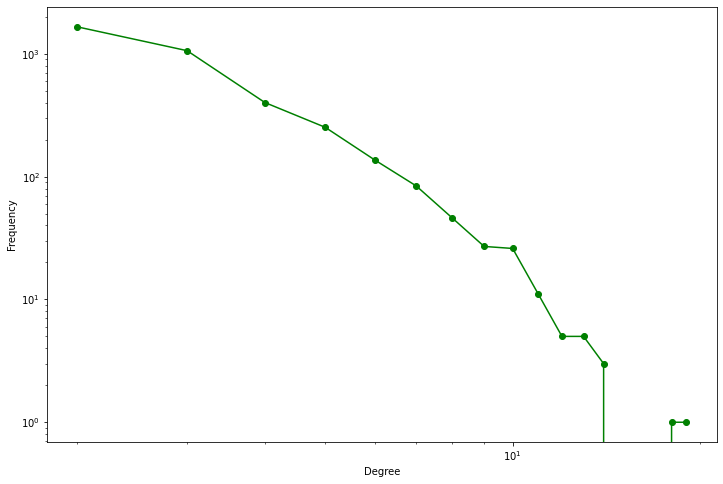

In [ ]:
kmin=2
degree_freq = nx.degree_histogram(G0)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[kmin:], degree_freq[kmin:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [ ]:
# Calculate alpha if the distribution looks like scale free
kmin=2 # You should change this value to minimum degree where scale free behavior is satisfied
node_degrees = [val/(kmin-0.5) for (node, val) in G0.degree()]
alpha= 1+G0.number_of_nodes() *  ( np.sum( np.log(node_degrees) ) )**(-1)
print('Alpha:', alpha)

Alpha: 3.5214171859127306


In [ ]:
plot_graph(G0)

## Analysis of the Network: DIRECTED

You can similarly analyze directed networks.

In [ ]:
# DIRECTED NETWORKS

# 7. Citation
NetworkData = pd.read_csv('citation.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node',create_using=nx.DiGraph())

# 8. Metabolic
# NetworkData = pd.read_csv('metabolic.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node',create_using=nx.DiGraph())

# 9. Email
# NetworkData = pd.read_csv('email.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node',create_using=nx.DiGraph())

# 10. WWW
# NetworkData = pd.read_csv('www.edgelist.txt', sep='\t', names=['start_node', 'end_node'])
# G = nx.from_pandas_edgelist(NetworkData, 'start_node', 'end_node',create_using=nx.DiGraph())
# G.number_of_nodes()

In [ ]:
# Directed Network
print("Total number of nodes (N): ", G.number_of_nodes())                # Print the number of nodes (N) 
print("Total number of links (L): ", G.number_of_edges())                # Print the number of links (L)
print("Average Degree (<k>): ", G.number_of_edges()/G.number_of_nodes()) # Average degree (<k>) = L / N
WCC = max(nx.weakly_connected_components(G), key=len)                    # Maximum connected component
G0 = G.subgraph(WCC)
print("Size of the giant component(S): ", G0.number_of_nodes()/G.number_of_nodes())      # Giant Component Size     
print("The average path length (l): ", nx.average_shortest_path_length(G0, method='bellman-ford'))   # Average Path Length 
# NOTE THAT AVERAGE PATH LENGTH RUN MIGHT TAKE VERY LONG FOR LARGE NETWORKS. YOU CAN "#" THE ABOVE LINE IF THAT IS THE CASE.
print("Global clustering coefficient (C): ", global_clustering_coefficient(G0))  # Global clustering coefficient
print("Average clustering coefficient (CWS): ", nx.average_clustering(G0))       # Average local clustering coefficient
print("Assortativity based on degree (r) :", nx.degree_assortativity_coefficient(G0,x='out',y='in')) # Print assortativity based on degree

Total number of nodes (N):  1039
Total number of links (L):  5802
Average Degree (<k>):  5.584215591915303
Size of the giant component(S):  1.0
The average path length (l):  2.571989147709466
Global clustering coefficient (C):  0.042274303420800234
Average clustering coefficient (CWS):  0.28056141848444327
Assortativity based on degree (r) : -0.04896676653605916


In [ ]:
WCC = max(nx.weakly_connected_components(G), key=len)                    # Maximum connected component
G0 = G.subgraph(WCC)

10717
5.0


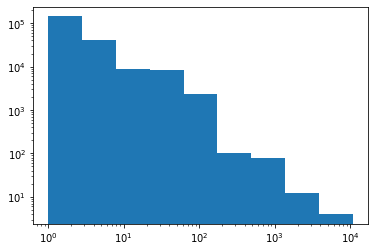

In [ ]:
# Plot the in degree distribution
import numpy
from matplotlib import pyplot as plt

data = [val for (node, val) in G0.in_degree()]
data=[e for i, e in enumerate(data) if e != 0] 
print(max(data))
print(np.ceil(np.log10(max(data))))
bins = range(int(np.log10(1)), int(np.ceil(np.log10(max(data)))))
bins2 = np.logspace(np.log10(1), np.log10(max(data)),num=10)
plt.xticks(bins, ["10^%s" % i for i in bins])
plt.hist(data, log=True, bins=bins2)
plt.gca().set_xscale("log")
plt.show()

In [ ]:
# Calculate the alpha if the in degree distribution looks like scale free
kmin=2 # You should change this value to minimum degree where scale free behavior is satisfied
data = [val for (node, val) in G0.in_degree()]
data=[e for i, e in enumerate(data) if e != 0] 
node_degrees = [val/(kmin-0.5) for val in data]
alpha= 1+G0.number_of_nodes() *  ( np.sum( np.log(node_degrees) ) )**(-1)
print('Alpha:', alpha)

Alpha: 4.933004507234145


399
3.0


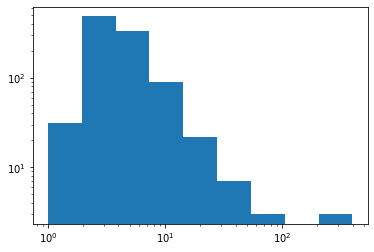

In [ ]:
# Plot the out degree distribution
import numpy
from matplotlib import pyplot as plt

data = [val for (node, val) in G0.out_degree()]
data=[e for i, e in enumerate(data) if e != 0] 
print(max(data))
print(np.ceil(np.log10(max(data))))
bins = range(int(np.log10(1)), int(np.ceil(np.log10(max(data)))))
bins2 = np.logspace(np.log10(1), np.log10(max(data)),num=10)
plt.xticks(bins, ["10^%s" % i for i in bins])
plt.hist(data, log=True, bins=bins2)
plt.gca().set_xscale("log")
plt.show()

In [ ]:
# Calculate alpha if the out degree distribution looks like scale free
kmin=2 # You should change this value to minimum degree where scale free behavior is satisfied
data = [val for (node, val) in G0.out_degree()]
data=[e for i, e in enumerate(data) if e != 0] 
node_degrees = [val/(kmin-0.5) for val in data]
alpha= 1+G0.number_of_nodes() * ( np.sum(np.log(node_degrees)) )**(-1)
print('Alpha:', alpha)

Alpha: 2.1354492981728734
